In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


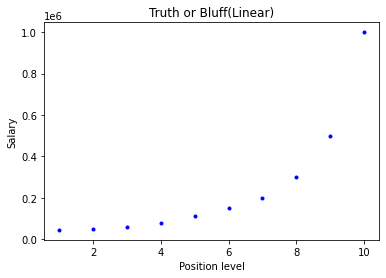

In [2]:
dataset = pd.read_csv('Dataset\Position_Salaries.csv')
print(dataset)
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
plt.plot(X,y,'b.')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Cost Function & Gradients
<b>Hypotesis</b>

$\begin{equation*}
\large
h(\boldsymbol{x};\boldsymbol{\theta})= \theta_0 + \theta_1x_i+ \theta_2x_i^2 + \cdots + \theta_nx_i^n
\end{equation*}
$

<b>Vectorial notation</b>
<b>if </b>
\begin{equation}
\large
\boldsymbol{x_{p_i}}=  [1 \quad x_i \quad x_i^2 \cdots x_i^n ]
\end{equation}
<b>then</b>
\begin{equation}
h(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{\theta}^T\boldsymbol{x_{p_i}}
\end{equation}


<b>Cost</b>
\begin{equation}
\large
J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Cost function for second degree polynomial</b>
\begin{equation}
\large
J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} ((\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)})^2 
\end{equation}


<b>partial derivatives for Gradient</b>
\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_0} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)})
\end{equation}

\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_1} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)})x_i
\end{equation}

\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_2} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)})x_i^2
\end{equation}


<b>Generalizing</b>
\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_n} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2 + \cdots + \theta_nx_i^n ) - y^{(i)})x_i^n
\end{equation}


\begin{equation}
\large
\nabla J(\boldsymbol{\theta}) = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)})\cdot\boldsymbol{x_{p_i}}
\end{equation}




## Polinomio de orden 3

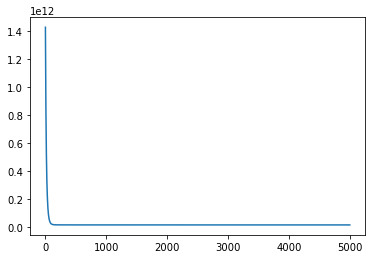

In [3]:
theta=np.array((random.randrange(-10, 10), 
                random.randrange(-10, 10), 
                random.randrange(-10,10), 
                random.randrange(-10,10)))
theta=np.reshape(theta,(len(theta),1))
lr = 1e-3
epochs=5000
m=np.mean(X)
std=np.std(X)
X=(X-m)/std
X_b=np.c_[np.ones((len(X),1)),X,X**2,X**3]

y=np.reshape(y,(len(y),1))
j_cost= np.zeros([epochs])

for i in range(epochs):
    pred= np.dot(X_b,theta)
    arg=pred - y
    grad= X_b.T.dot(arg)
    theta = theta -lr*grad
    j_cost[i]=np.sum(np.square(arg))

fig = plt.figure()
plt.plot(j_cost)
plt.show()
# print(f" model loss: {GD[1]} vs {theta.T}")
# print(f"Now have smaller model loss: {updated_model_loss} vs {j_cost[-1]}")

    

(314, 4)


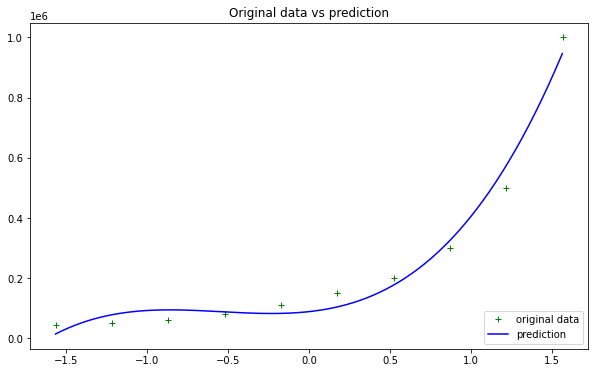

[[ 89187.50194501]
 [ 58918.60087237]
 [160312.49866823]
 [ 97640.31049966]]


In [4]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
Xt=X_grid
X_grid =np.c_[np.ones((len(X_grid ),1)),X_grid ,X_grid **2,X_grid **3]
print(X_grid.shape)
pred= np.dot(X_grid,theta)
plt.figure(figsize=(10,6))
plt.plot(X, y, 'g+', label = 'original data')
plt.plot(Xt, pred, 'b', label = 'prediction')
plt.title('Original data vs prediction')
plt.legend(loc="lower right")
plt.show()
print(theta)

In [5]:
z = np.polyfit(X.reshape(len(X,)), y, 3)
print(z)

[[ 97629.9469015 ]
 [160312.5       ]
 [ 58939.51404173]
 [ 89187.5       ]]


## Polinomio de orden 6

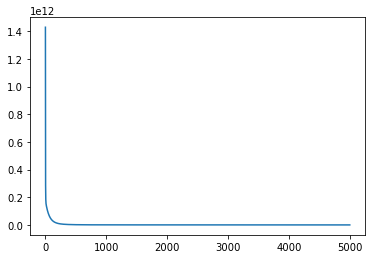

In [6]:
theta=np.array((random.randrange(-10, 10), 
                random.randrange(-10, 10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10)))
theta=np.reshape(theta,(len(theta),1))
lr = 1e-3
epochs=5000
X_b=np.c_[np.ones((len(X),1)),X,X**2,X**3,X**4,X**5,X**6]
y=np.reshape(y,(len(y),1))
j_cost= np.zeros([epochs])

for i in range(epochs):
    pred= np.dot(X_b,theta)
    arg=pred - y
    grad= X_b.T.dot(arg)
    theta = theta -lr*grad
    j_cost[i]=np.sum(np.square(arg))

fig = plt.figure()
plt.plot(j_cost)
plt.show()

(314, 7)


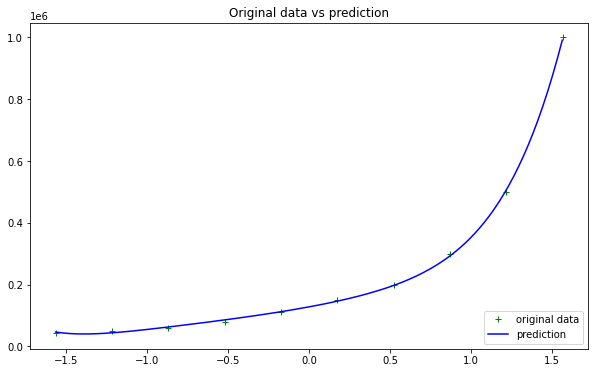

[[128180.25013554]
 [ 97108.07032134]
 [ 42331.20957088]
 [ 29840.72320719]
 [ 23572.60109082]
 [ 22129.98929513]
 [ 10025.80365644]]


In [7]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
Xt=X_grid
X_grid =np.c_[np.ones((len(X_grid ),1)),X_grid ,X_grid **2,X_grid **3,X_grid **4,X_grid **5,X_grid **6]
print(X_grid.shape)
pred= np.dot(X_grid,theta)
plt.figure(figsize=(10,6))
plt.plot(X, y, 'g+', label = 'original data')
plt.plot(Xt, pred, 'b', label = 'prediction')
plt.title('Original data vs prediction')
plt.legend(loc="lower right")
plt.show()
print(theta)

In [8]:
z = np.polyfit(X.reshape(len(X,)), y, 6)
print(z)

[[ 11113.33007813]
 [ 30828.00211602]
 [ 19408.44726562]
 [  1097.81906346]
 [ 46252.49023438]
 [116188.82191987]
 [127625.73242188]]


## Polinomio de orden 8 sobreajuste

(9, 1)


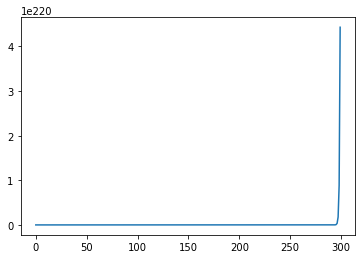

In [9]:
theta=np.array((random.randrange(-10, 10), 
                random.randrange(-10, 10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10),
                random.randrange(-10,10),
                random.randrange(-10,10),
                random.randrange(-10,10)))
theta=np.reshape(theta,(len(theta),1))
print(theta.shape)
lr = 1e-3
epochs=300
X_b=np.c_[np.ones((len(X),1)),X,X**2,X**3,X**4,X**5,X**6,X**7,X**8]
y=np.reshape(y,(len(y),1))
j_cost= np.zeros([epochs])

for i in range(epochs):
    pred= np.dot(X_b,theta)
    arg=pred - y
    grad= X_b.T.dot(arg)
    theta = theta -lr*grad
    j_cost[i]=np.sum(np.square(arg))

fig = plt.figure()
plt.plot(j_cost)
plt.show()

(314, 9)


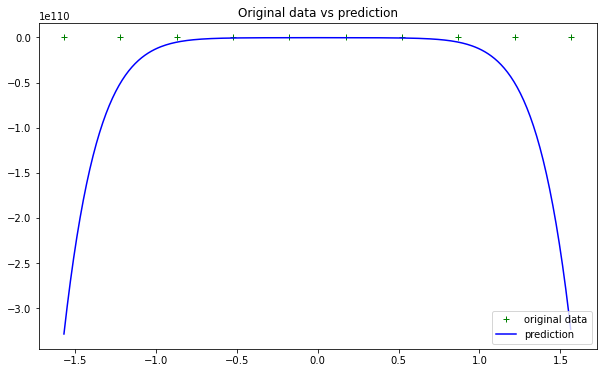

[[-2.38331407e+107]
 [ 4.44132522e+091]
 [-5.47937819e+107]
 [ 1.32081393e+092]
 [-1.29542521e+108]
 [ 2.41927440e+092]
 [-3.10946306e+108]
 [-2.74445226e+092]
 [-7.53041897e+108]]


In [10]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
Xt=X_grid
X_grid =np.c_[np.ones((len(X_grid ),1)),X_grid ,X_grid **2,X_grid **3,X_grid **4,
              X_grid **5,X_grid **6,X_grid **7,X_grid **8]
print(X_grid.shape)
pred= np.dot(X_grid,theta)
plt.figure(figsize=(10,6))
plt.plot(X, y, 'g+', label = 'original data')
plt.plot(Xt, pred, 'b', label = 'prediction')
plt.title('Original data vs prediction')
plt.legend(loc="lower right")
plt.show()
print(theta)